## Serie de tiempo - Pedidos

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

df = pd.read_csv('C:/Users/Predator/Desktop/Maestr-IA/4) Algoritmos de Opitimizacion/pedidos.csv', sep = ';')

display(df.head())
#print(df.describe())
print(df.info())   #Para ver la naturaleza de los datos y comprobar si la fecha viene como object

,Num Factura,Codigo,Cliente,Razon Social,Producto,Proveedor,Cantidad vendida,Cantidad devuelta,Pacas vendidas,Pacas devueltas,...,PROYECCION,cant_facturas,RUTA,NOMBRE ASESOR,CANTCLIENTE,MES,CAJAS NO ENTREGADAS,Ultima Compra,DIA COMPRA,Nombre del día
0,BG1,10473.0,HAYDEE ESPERANZA CASALLAS NIVIAYO,MTCD CONFECCIONES Y DOTACIONES S.A.S,2012-JUGO POOL NAR- PINA 400ML,GASEOSAS POOL,384,0,16,0,...,"0,000359018",0.0,BOG100705,DIANA ROMERO ROMERO,0.0,ENERO,0,5/01/2022,5/01/2022,miércoles
1,BG1,10473.0,HAYDEE ESPERANZA CASALLAS NIVIAYO,MTCD CONFECCIONES Y DOTACIONES S.A.S,2014-JUGO POOL SALPICON 400 ML,GASEOSAS POOL,408,0,17,0,...,"0,000381457",0.0,BOG100705,DIANA ROMERO ROMERO,0.0,ENERO,0,5/01/2022,5/01/2022,miércoles
2,BG1,10473.0,HAYDEE ESPERANZA CASALLAS NIVIAYO,MTCD CONFECCIONES Y DOTACIONES S.A.S,2025-JUGO POOL PASSION FRUIT 400 ML,GASEOSAS POOL,384,0,16,0,...,"0,000359018",1.0,BOG100705,DIANA ROMERO ROMERO,1.0,ENERO,0,5/01/2022,5/01/2022,miércoles
3,BG1,10473.0,HAYDEE ESPERANZA CASALLAS NIVIAYO,MTCD CONFECCIONES Y DOTACIONES S.A.S,2043-JUGO POOL PASSION FRUIT 1700ML,GASEOSAS POOL,120,0,15,0,...,"0,000336579",0.0,BOG100705,DIANA ROMERO ROMERO,0.0,ENERO,0,5/01/2022,5/01/2022,miércoles
4,BG1,10473.0,HAYDEE ESPERANZA CASALLAS NIVIAYO,MTCD CONFECCIONES Y DOTACIONES S.A.S,2077-JUGO POOL SALPICON 1.7 ML,GASEOSAS POOL,120,0,15,0,...,"0,000336579",0.0,BOG100705,DIANA ROMERO ROMERO,0.0,ENERO,0,5/01/2022,5/01/2022,miércoles


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47820 entries, 0 to 47819
Data columns (total 70 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Num Factura          47820 non-null  object 
 1   Codigo               47795 non-null  float64
 2   Cliente              47792 non-null  object 
 3   Razon Social         47629 non-null  object 
 4   Producto             47820 non-null  object 
 5   Proveedor            47820 non-null  object 
 6   Cantidad vendida     47820 non-null  int64  
 7   Cantidad devuelta    47820 non-null  int64  
 8   Pacas vendidas       47820 non-null  object 
 9   Pacas devueltas      47820 non-null  object 
 10  Valor                47820 non-null  object 
 11  Costo                47820 non-null  object 
 12  Peso                 47820 non-null  object 
 13  IVA                  47820 non-null  int64  
 14  Asesor               47820 non-null  int64  
 15  Ciudad               47766 non-null 

In [43]:
# Convertir 'DIA COMPRA' a datetime
df['DIA COMPRA'] = pd.to_datetime(df['DIA COMPRA'], format='%d/%m/%Y')

#Df resumido con variables de interes para la prediccion
serie_tiempo = df.groupby('DIA COMPRA').agg(
                Cantidad_pedidos=('DIA COMPRA', 'size'),
                #Suma_VALORREAL=('VALORREAL', 'sum')
).reset_index()

# Convertir DIA COMPRA a índice de tiempo
serie_tiempo.set_index('DIA COMPRA', inplace=True)
display(serie_tiempo)

,Cantidad_pedidos
DIA COMPRA,
2021-12-15,167
2021-12-16,223
2021-12-17,291
2021-12-18,324
2021-12-20,418
...,...
2022-02-25,1044
2022-02-26,831
2022-02-28,971


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 65 entries, 2021-12-15 to 2022-03-02
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Cantidad_pedidos  65 non-null     int64
dtypes: int64(1)
memory usage: 1.0 KB


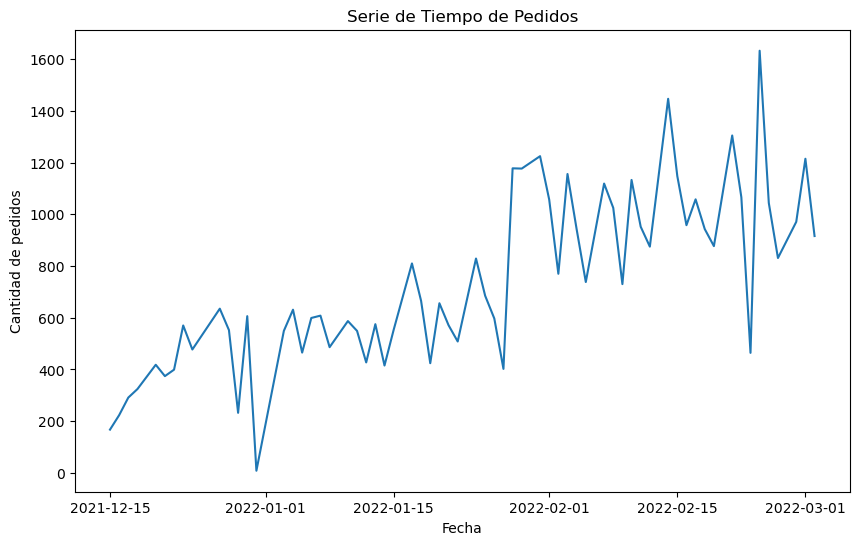

In [48]:
serie_tiempo.info() # comprobamos que la bd resumida queda como indice
serie_tiempo.shape # matriz de 65*1

# Visualizar la serie de tiempo
plt.figure(figsize=(10, 6))
plt.plot(serie_tiempo)
plt.title('Serie de Tiempo de Pedidos')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pedidos')
plt.show()

In [45]:
serie_tiempo.describe()

,Cantidad_pedidos
count,65.000000
mean,735.692308
std,333.935291
min,8.000000
25%,486.000000
50%,656.000000
75%,971.000000
max,1633.000000


Tenemos 65 registros de fechas, con una media de 736 pedidos por dia aproximadamente, con una desviacion estandar de 334 pedidos, esto indica una variabilidad considerable alrededor de la media, varian considerablemente de una fecha a otra.

El pedido mínimo que se realizó en una fecha fue de 8 pedidos, mientras que el pedido máximo fue de 1633 pedidos. El 50% de los pedidos estan entre 486 y 971 por el rango intercuartilico. La mediana está en 656 pedidos, lo que significa que la mitad de las fechas tienen mas o menos de 656 pedidos

Como se que mi dataframe ya tiene variable tiempo categorizada como tiene que ser, procedo a analizar si la serie tiene evidencia estadistica para decir que es o no estacionaria

In [47]:
from statsmodels.tsa.stattools import adfuller
resultado_adf = adfuller(serie_tiempo['Cantidad_pedidos'])

print("Estadístico ADF:", resultado_adf[0])
print("Valor p:", resultado_adf[1])
print("Valores críticos:")
for clave, valor in resultado_adf[4].items():
    print(f"   {clave}: {valor}")

Estadístico ADF: -1.798682724166001
Valor p: 0.381115880343491
Valores críticos:
   1%: -3.540522678829176
   5%: -2.9094272025108254
   10%: -2.5923136524453696


Como el valor p es mayor que un nivel de significancia del 0.05, se rechaza la hipótesis nula de que la serie de tiempo tiene una raíz unitaria, es decir la serie no es estacionaria.

Gracias a esta prueba debemos diferenciar la serie, es decir restar el valor actual del valor anterior en cada momento, esto puede ayudar a estabilizar la media de la serie al eliminar cambios dependientes del tiempo. Sea el modelo que sea si no se diferencia, predecira mal.

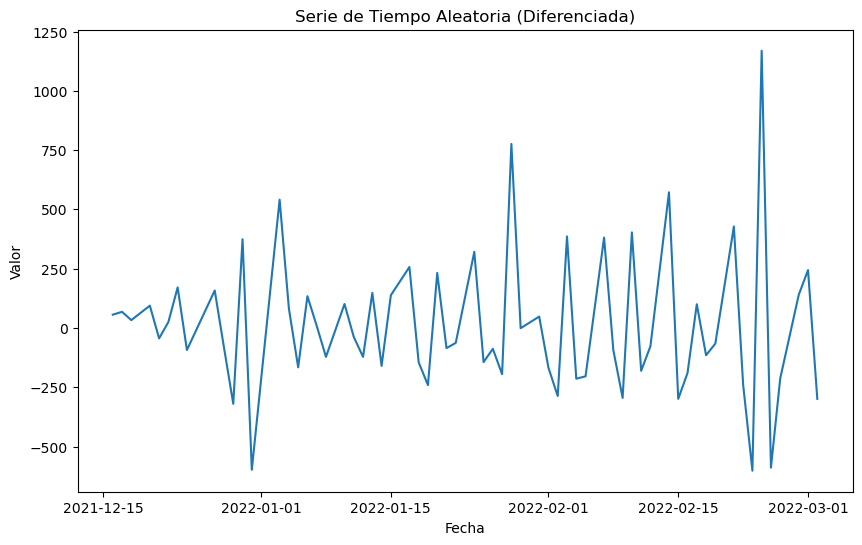

In [49]:
# Diferenciar la serie de tiempo
serie_diferenciada = serie_tiempo.diff().dropna()

# Visualizar la serie de tiempo diferenciada
plt.figure(figsize=(10, 6))
plt.plot(serie_diferenciada)
plt.title('Serie de Tiempo Aleatoria (Diferenciada)')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.show()

Para demostrar que solo se necesita una diferenciación, volvemos a ejecutar el test de Dickey Fuller

In [51]:
resultado_adf_ = adfuller(serie_diferenciada['Cantidad_pedidos'])

print("Estadístico ADF:", resultado_adf_[0])
print("Valor p:", resultado_adf_[1])
print("Valores críticos:")
for clave, valor in resultado_adf_[4].items():
    print(f"   {clave}: {valor}")

Estadístico ADF: -12.360512928904617
Valor p: 5.560255903318159e-23
Valores críticos:
   1%: -3.540522678829176
   5%: -2.9094272025108254
   10%: -2.5923136524453696


En este caso el valor p es menor que un nivel de significancia del 0.05, se acepta la hipótesis nula de que la serie de tiempo tiene una raíz unitaria, es decir la serie es estacionaria.

Ahora procederemos a hacer un modelo ARIMA y un SARIMA

Mejores parámetros: (0, 1, 2)
                               SARIMAX Results                                
Dep. Variable:       Cantidad_pedidos   No. Observations:                   64
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -433.819
Date:                Thu, 09 Jan 2025   AIC                            873.638
Time:                        21:54:00   BIC                            880.067
Sample:                             0   HQIC                           876.166
                                 - 64                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.8806      1.463     -1.285      0.199      -4.748       0.987
ma.L2          0.8813      1.273      0.693      0.489      -1.613       3.376
sigma2      4.853e+04 

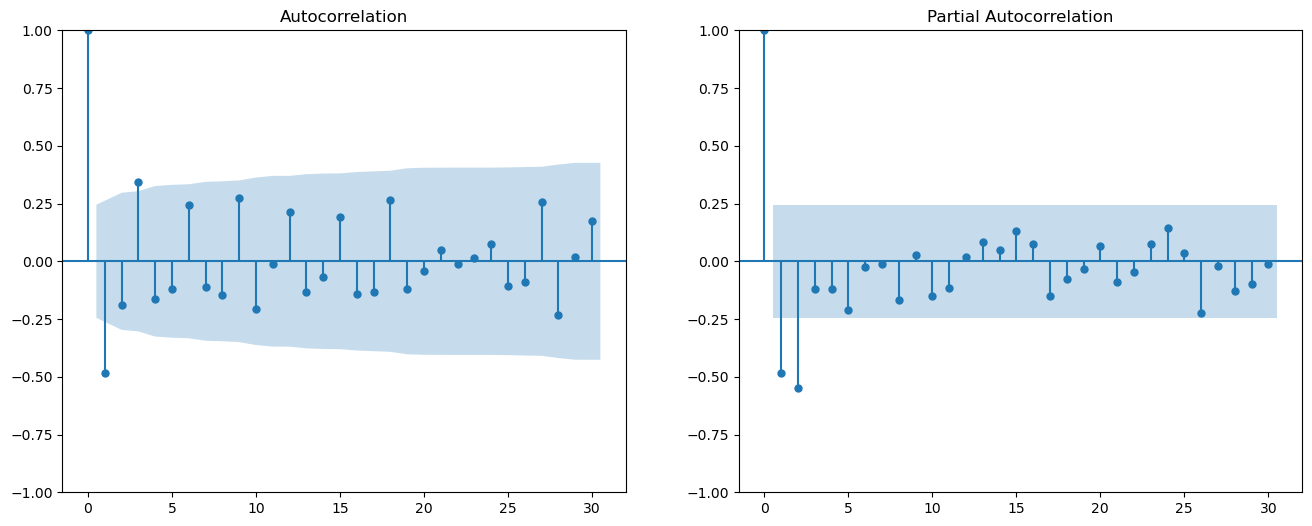

In [55]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
import itertools
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# Definir los rangos de los parámetros p, d, q
p = d = q = range(0, 3)  # Probaremos con valores de 0 a 2 ya que esta estacionaria la seria
param_combinations = list(itertools.product(p, d, q))

# Almacenar resultados en variables
best_aic = float("inf")
best_params = None
best_model = None

# Iterar sobre todas las combinaciones posibles de parámetros
for params in param_combinations:
    try:
        model = ARIMA(serie_diferenciada['Cantidad_pedidos'], order=params)
        result = model.fit()
        if result.aic < best_aic:
            best_aic = result.aic
            best_params = params
            best_model = result
    except:
        continue

print(f"Mejores parámetros: {best_params}")
print(best_model.summary())

# Generar el autocorrelograma y correlacion parcial
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(serie_diferenciada['Cantidad_pedidos'], lags=30, ax=axes[0])
plot_pacf(serie_diferenciada['Cantidad_pedidos'], lags=30, ax=axes[1])

plt.show()

El iterador busca los parametros mas optimos para el modelo ARIMA, estos son (0,1,2) y se alinea con el autocorrelograma y la autocorrelacion aprcial. El AIC es de 874 es el menor valor que puede encontrar este modelo para ajustar.

Si consideramos un nivel de significancia del 0.05 tenemos lo siguiente: 
 - La probabilidad de la prueba de Ljung-Box es de 0.38, lo que significa que no hay suficiente evidencia para rechazar la hipótesis nula de que las autocorrelaciones son iguales a cero. Esto indica que no hay autocorrelaciones significativas en los residuos. 
 - Por el lado de la prueba de normalidad de Jarque-Bera se tiene una probabilidad de 0.11 sugiere que no hay suficiente evidencia para rechazar la hipótesis nula de normalidad. Por lo tanto, los residuos del modelo parecen estar aproximadamente normalmente.
 - Tambien la prueba de heteroscedastisidad tiene una probabilidad de 0.02, indica que podemos rechazar la hipótesis nula de homocedasticidad, lo que sugiere que hay heterocedasticidad en los residuos. Es decir, la varianza de los residuos no es constante a lo largo del tiempo.
 - La asimetria por estar cerca a 0 muestra que los valores son relativamentew simetricos y la curtosis es un poco alta lo que se traduce en posible presencia de outliers
 
Aunque son buenos indicios para un modelo de prediccion ARIMA vamos a contrastarlo con un SARIMA (con estacionalidad considerada como parametro) para ver que error es menor y asi saber si ajusta mejor.

Mejores parámetros: (0, 0, 1)
Mejores parámetros estacionales: (0, 1, 1)
                                     SARIMAX Results                                      
Dep. Variable:                   Cantidad_pedidos   No. Observations:                   64
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -360.999
Date:                            Thu, 09 Jan 2025   AIC                            727.998
Time:                                    22:23:44   BIC                            733.852
Sample:                                         0   HQIC                           730.242
                                             - 64                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8295      0.094     -8.8

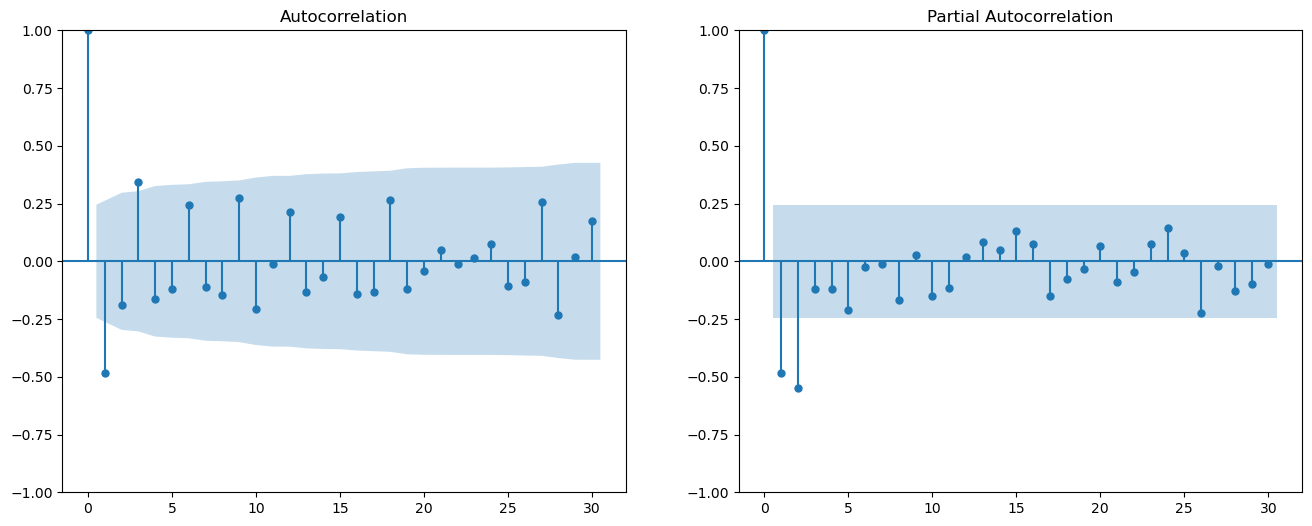

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
import itertools
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# Aqui se deben tambien considerar los parámetros estacionales P, D, Q
p = d = q = range(0, 2)
P = D = Q = range(0, 2)
seasons = 12

param_combinations = list(itertools.product(p, d, q))
seasonal_combinations = list(itertools.product(P, D, Q))

best_aic = float("inf")
best_params = None
best_seasonal_params = None
best_model = None

# Iterar sobre todas las combinaciones posibles de parámetros
for params in param_combinations:
    for seasonal_params in seasonal_combinations:
        try:
            model = SARIMAX(serie_diferenciada['Cantidad_pedidos'], order=params, 
                            seasonal_order=(seasonal_params + (seasons,)))
            result = model.fit()
            if result.aic < best_aic:
                best_aic = result.aic
                best_params = params
                best_seasonal_params = seasonal_params
                best_model = result
        except:
            continue

# Mostrar los mejores parámetros y el resumen del mejor modelo
print(f"Mejores parámetros: {best_params}")
print(f"Mejores parámetros estacionales: {best_seasonal_params}")
print(best_model.summary())

# Generar el autocorrelograma
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(serie_diferenciada['Cantidad_pedidos'], lags=30, ax=axes[0])
plot_pacf(serie_diferenciada['Cantidad_pedidos'], lags=30, ax=axes[1])

plt.show()


De entrada el SARIMA ajusta mejor pues tiene un AIC de 727. Si consideramos el mismo analisis que se hizo para el ARIMA en pocas palabras tenemos que cambia la varianza de los residuos pues ahora es constante a lo largo del tiempo. Esto es deseable en series de tiempo.

También los residuos están ligeramente sesgados hacia la derecha y tienen colas algo más pesadas que una distribución normal.

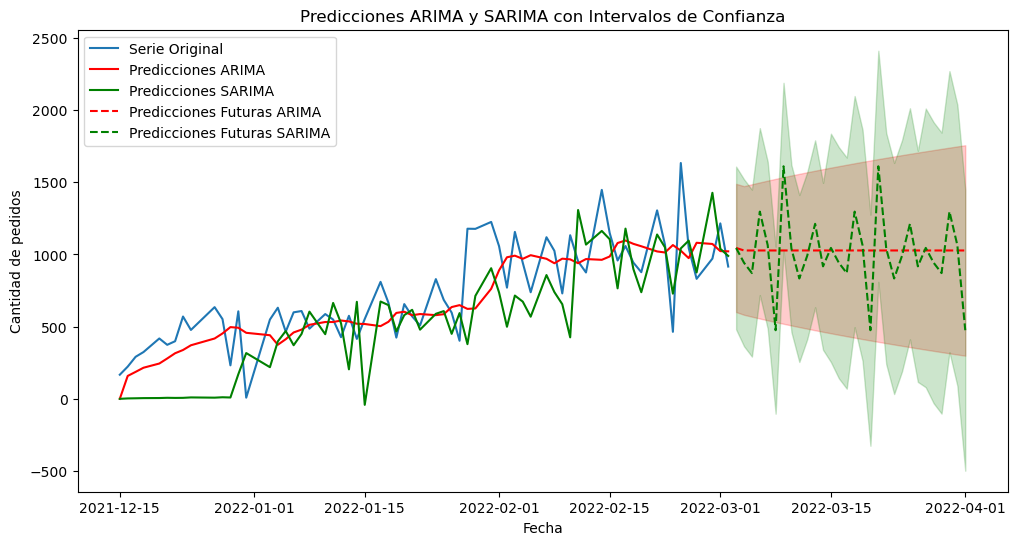

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajustar el modelo ARIMA sobre la serie de tiempo original
modelo_arima = ARIMA(serie_tiempo['Cantidad_pedidos'], order=(0, 1, 2))
resultado_arima = modelo_arima.fit()

# Ajustar el modelo SARIMA sobre la serie de tiempo original
modelo_sarima = SARIMAX(serie_tiempo['Cantidad_pedidos'], order=(0, 0, 1), seasonal_order=(0, 1, 1, 12))
resultado_sarima = modelo_sarima.fit()

# Hacer predicciones dentro de la muestra con ARIMA
predicciones_arima_in_sample = resultado_arima.fittedvalues

# Hacer predicciones dentro de la muestra con SARIMA
predicciones_sarima_in_sample = resultado_sarima.fittedvalues

# Hacer predicciones futuras con intervalos de confianza para ARIMA
forecast_arima = resultado_arima.get_forecast(steps=30)
predicciones_arima_out_sample = forecast_arima.predicted_mean
intervalos_confianza_arima = forecast_arima.conf_int(alpha=0.05)

# Hacer predicciones futuras con intervalos de confianza para SARIMA
forecast_sarima = resultado_sarima.get_forecast(steps=30)
predicciones_sarima_out_sample = forecast_sarima.predicted_mean
intervalos_confianza_sarima = forecast_sarima.conf_int(alpha=0.05)

# Visualizar las predicciones junto con la serie original
plt.figure(figsize=(12, 6))
plt.plot(serie_tiempo, label='Serie Original')
plt.plot(predicciones_arima_in_sample, label='Predicciones ARIMA', color='red')
plt.plot(predicciones_sarima_in_sample, label='Predicciones SARIMA', color='green')

# Añadir predicciones futuras
pred_dates = pd.date_range(serie_tiempo.index[-1] + timedelta(days=1), periods=30, freq='D')
plt.plot(pred_dates, predicciones_arima_out_sample, label='Predicciones Futuras ARIMA', color='red', linestyle='--')
plt.fill_between(pred_dates, intervalos_confianza_arima.iloc[:, 0], intervalos_confianza_arima.iloc[:, 1], color='red', alpha=0.2)
plt.plot(pred_dates, predicciones_sarima_out_sample, label='Predicciones Futuras SARIMA', color='green', linestyle='--')
plt.fill_between(pred_dates, intervalos_confianza_sarima.iloc[:, 0], intervalos_confianza_sarima.iloc[:, 1], color='green', alpha=0.2)

plt.title('Predicciones ARIMA y SARIMA con Intervalos de Confianza')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pedidos')
plt.legend(loc='upper left')
plt.show()



In [67]:
from sklearn.metrics import mean_squared_error

# MSE para ARIMA dentro de la muestra
mse_arima = mean_squared_error(serie_tiempo['Cantidad_pedidos'], predicciones_arima_in_sample)
print("MSE ARIMA:", mse_arima)

# MSE para SARIMA dentro de la muestra
mse_sarima = mean_squared_error(serie_tiempo['Cantidad_pedidos'], predicciones_sarima_in_sample)
print("MSE SARIMA:", mse_sarima)


MSE ARIMA: 51082.48133564862
MSE SARIMA: 98158.25814071592


El Error cuadratico medio mas bajo es el de ARIMA, sin embargo por su alto AIC puede que este sobreajustando el entrenamiento de los datos y esto hace que las predicciones no sean muy buenas. Por otro lado, aunque SARIMA tiene un MSE más alto, su AIC más bajo sugiere que podría ser más robusto para predicciones futuras al no estar tan sobreajustado.

In [73]:
predicciones_sarima_df = pd.DataFrame({
    'Predicciones': predicciones_sarima_out_sample,
    'Int_Lower': intervalos_confianza_sarima.iloc[:, 0],
    'Int_Upper': intervalos_confianza_sarima.iloc[:, 1]
})
display(predicciones_sarima_df)


,Predicciones,Int_Lower,Int_Upper
65,1044.452016,480.951255,1607.952777
66,942.280612,364.229884,1520.331340
67,870.632069,292.581341,1448.682797
68,1296.494021,718.443292,1874.544749
69,1063.613794,485.563066,1641.664522
70,475.121785,-102.928943,1053.172513
71,1610.287628,1032.236900,2188.338356
72,1040.419108,462.368380,1618.469837
73,833.384007,255.333279,1411.434735
74,990.921102,412.870373,1568.971830
